# Introduction to Computational Science
# Assignment 2

## Gillespie Algorithm

1. Generate two random numbers between 0 and 1
2. Estimate time until next event based on cumulative rates of all possible events.
3. Convert event rates into probabilities by randomly selecting one of these events.
4. Repeat this process to iterate the model through time.


### Events:
1. Birth X→X+1
2. Transmission Y→ Y + 1 and X→ X −1
3. Recovery Y→Y−1 and Z→ Z + 1
4. Death, three independent events, X→ X − 1, Y → Y − 1, Z→ Z − 1
5. Import via migration Y→ Y + 1
6. Import via external infection Y → Y + 1, X→ X - 1

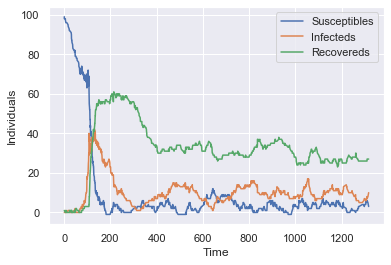

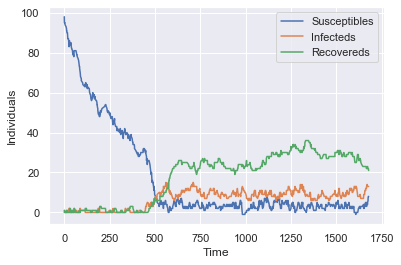

In [402]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import pandas as pd

class Gillespie:

    def __init__(self, X, Y, beta, gamma, mu):
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.delta = 0.01
        self.epsilon = 0.001
        self.N = 100
        self.X = X
        self.Y = Y
        self.Z = 0
        self.T = 0


    def get_rates(self, X, Y, Z):
        """
        Determine at which rate an event occurs.
        """
        rate_E1 = self.mu * self.N
        rate_E2 = self.beta * self.X * self.Y / self.N
        rate_E3 = self.gamma * self.Y
        rate_E4 = self.mu * self.X
        rate_E5 = self.mu * self.Y
        rate_E6 = self.mu * self.Z
        rate_E7 = self.delta   * 0
        rate_E8 = self.epsilon * self.X  * 0

        events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6, rate_E7, rate_E8]

        return events

    def gillespie(self):
        """
        Choose the next time and event.
        """

        # Generate two random numbers between 0 and 1.
        random_time = np.random.rand()

        events = self.get_rates(self.X, self.Y, self.Z)

        Rtotal = sum(events)

        # Get reaction time
        tau = (1.0/Rtotal) * np.log((1.0/random_time))
        self.T += tau

        # Determine which event occurs
        # Make list of reaction intervals
        rates = []
        for i in events:
            rates.append(i/Rtotal)

        random_event = random.uniform(0, max(rates))

        # Find event to be executed based on closest number to
        # a random number in rates-array
        found = self.find_nearest(rates, random_event)

        # Retrieve which event is related to this interval
        for k in range(len(rates)):
            if rates[k] == found:
                index = k
                break

        # Birth
        if index == 0:
            self.X += 1

        # Transmission
        elif index == 1:
            self.Y += 1
            self.X -= 1

        # Recovery
        elif index == 2:
            self.Z += 1
            self.Y -= 1

        # Death
        elif index == 3:
            self.X -= 1
        elif index == 4:
            self.Y -= 1
        elif index == 5:
            self.Z -= 1
        
        # Import via immigration
        elif index == 6:
            self.Y += 1
            
        # Import via external infection
        else:
            self.Y += 1
            self.X -= 1
        
        return self.X, self.Y, self.Z, self.T

    def find_nearest(self, array, value):
        """
        Find nearest value in array.
        """

        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]


if __name__ == '__main__':

    for i in range(2):
        gillespie = Gillespie(99, 1, 1/3, 0.01, 0.003)

        plots = []
        time = []
        

        for j in range(1000):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)


        # plt.plot(time, Xs)
        plt.plot(time, plots)
        plt.legend(['Susceptibles', 'Infecteds', 'Recovereds'], loc="upper right")
        plt.xlabel("Time")
        plt.ylabel("Individuals")
        plt.show()


## 1. Variability
### Run several models with the same initial conditions to do a statistical analysis on variance

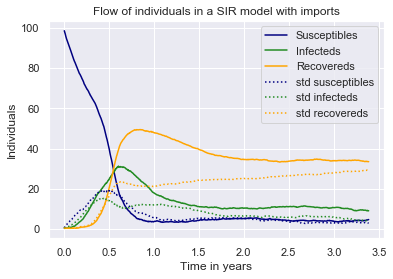

Fixed point for X =  4.72
Fixed point for Y =  9.09
Fixed point for Z =  33.51

Mean of X =  18.77367 variance =  24.953073101946785
Mean of Y =  15.15648 variance =  7.870132769502685
Mean of Z =  31.779889999999998 variance =  14.371712962896943


In [422]:
totalX = []
totalY = []
totalZ = []
totalT = []

for i in range(100): 
    gillespie = Gillespie(99, 1, 1/3, 0.01, 0.003)

    plots = []
    time = []
    Xs = []
    Ys = []
    Zs = []
    Ts = []


    for j in range(1000):
        X, Y, Z, T = gillespie.gillespie()
        plots.append([X, Y, Z])
        time.append(T)
        Xs.append(X)
        Ys.append(Y)
        Zs.append(Z)
        Ts.append(T/365)

    totalX.append(Xs)
    totalY.append(Ys)
    totalZ.append(Zs)
    totalT.append(Ts)
    
    
    
    
    

def getMeans(X0, Y0):

    totalX, totalY, totalZ, totalT = [], [], [], []


    for i in range(100):
        gillespie = Gillespie(X0, Y0, 1/3, 0.01, 0.001)

        plots, time, Xs, Ys, Zs, Ts = [], [], [], [], [], []

        for j in range(1000):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)
            Xs.append(X)
            Ys.append(Y)
            Zs.append(Z)
            Ts.append(T / 365)

        totalX.append(Xs)
        totalY.append(Ys)
        totalZ.append(Zs)
        totalT.append(Ts)


    # Calculate means
    meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]
    
    return meansX, meansY, meansZ, barsX, barsY, barsZ, totalT
    
X0 = 99
Y0 = 1

# TODO: errorbars plotten om variatie te laten zien of confidence interval (seaborn?)
# meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeans(X0, Y0)


        
        

# Calculate means
meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]

# TODO: errorbars plotten om variatie te laten zien of confidence interval (seaborn?)
plt.plot(totalT, meansX, color="navy")
plt.plot(totalT, meansY, color="forestgreen")
plt.plot(totalT, meansZ, color="orange")
plt.plot(totalT, barsX, color="navy", linestyle=":")
plt.plot(totalT, barsY, color="forestgreen", linestyle=":")
plt.plot(totalT, barsZ, color="orange", linestyle=":")
plt.legend(['Susceptibles', 'Infecteds', 'Recovereds', "std susceptibles", "std infecteds", "std recovereds"], loc="upper right")
plt.xlabel("Time in years")
plt.ylabel("Individuals")
plt.title("Flow of individuals in a SIR model with imports")
plt.show()

print("Fixed point for X = ", meansX[-1])
print("Fixed point for Y = ", meansY[-1])
print("Fixed point for Z = ", meansZ[-1])
print("")
print("Mean of X = ", np.mean(meansX), "variance = ", np.std(meansX))
print("Mean of Y = ", np.mean(meansY), "variance = ", np.std(meansY))
print("Mean of Z = ", np.mean(meansZ), "variance = ", np.std(meansZ))



## 2. Covariance between S and I

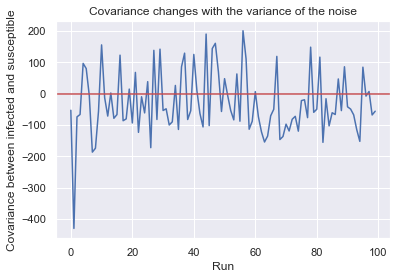

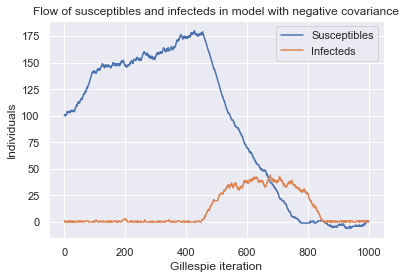

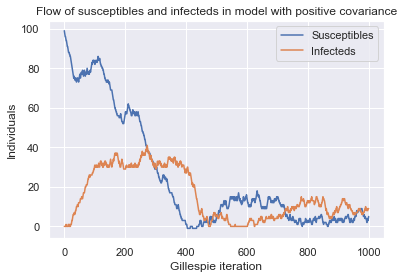

In [418]:
def covariance():
    """
    Return covariance between susceptibles (X) and infecteds (Y).
    """

    
    covariances, negativesX, negativesY = [], [], []
    positiveX, positiveY = [], []
    
    for i in range(len(totalX)):
        cov = np.cov(totalX[i], totalY[i])[0][1]
        covariances.append(cov)
        if cov < -100:
            negativesX.append(totalX[i])
            negativesY.append(totalY[i])
        elif cov > 100:
            positiveX.append(totalX[i])
            positiveY.append(totalY[i])
            
    return covariances, negativesX, negativesY, positiveX, positiveY

covariances, negativeX, negativeY, positiveX, positiveY = covariance()

plt.plot(covariances)
plt.ylabel("Covariance between infected and susceptible")
plt.xlabel("Run")
plt.title("Covariance changes with the variance of the noise")
plt.axhline(y=0, color='r')
plt.show()

plt.title("Flow of susceptibles and infecteds in model with negative covariance")
plt.ylabel("Individuals")
plt.xlabel("Gillespie iteration")
plt.plot(negativeX[0])
plt.plot(negativeY[0])
plt.legend(["Susceptibles", "Infecteds"])
plt.show()

plt.title("Flow of susceptibles and infecteds in model with positive covariance")
plt.ylabel("Individuals")
plt.xlabel("Gillespie iteration")
plt.plot(positiveX[0])
plt.plot(positiveY[0])
plt.legend(["Susceptibles", "Infecteds"])
plt.show()


    

## 3. Increased transients
### For stochastic models, we need to consider both the long-term behavior and the short-term “transient” dynamics.

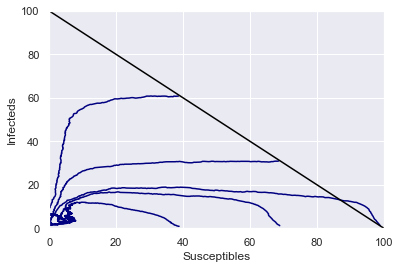

In [424]:
X0 = 99
Y0 = 1

for i in range(3):
    meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeans( X0, Y0)
    plt.plot(meansX, meansY, color="navy")
    X0 -= 30

X0 = 69
Y0 = 31
for i in range(2):
    meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeans( X0, Y0)
    plt.plot(meansX, meansY, color="navy")
    X0 -= 30
    Y0 += 30

plt.ylim([0,100])
plt.xlim([0,100])
plt.plot([100, 0], [0, 100], color="black")
plt.xlabel("Susceptibles")
plt.ylabel("Infecteds")
plt.show()


## 4. Stochastic resonance

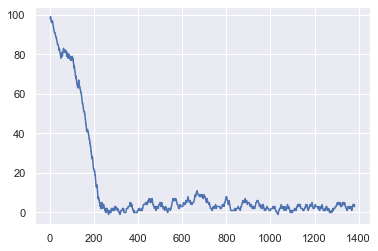

In [289]:
plt.plot(totalT, totalX[0])
plt.show()

## 5. Extinction

R0 =  25.64102564102564
P extinction =  0.029997300242978135


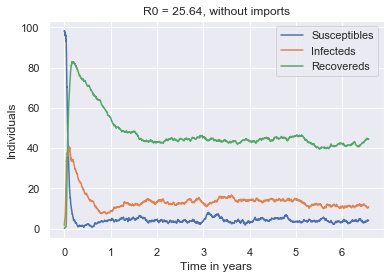

R0 =  0.7374631268436577
P extinction =  1.314793418064465


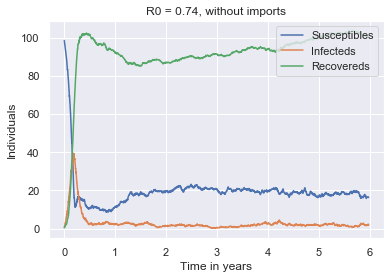

In [365]:
def getMeansExtinctions(beta, gamma, mu):

    totalX, totalY, totalZ, totalT = [], [], [], []


    for i in range(10):
        gillespie = Gillespie(99, 1, beta, gamma, mu)

        plots, time, Xs, Ys, Zs, Ts = [], [], [], [], [], []

        for j in range(2000):
            X, Y, Z, T = gillespie.gillespie()
            plots.append([X, Y, Z])
            time.append(T)
            Xs.append(X)
            Ys.append(Y)
            Zs.append(Z)
            Ts.append(T/365)

        totalX.append(Xs)
        totalY.append(Ys)
        totalZ.append(Zs)
        totalT.append(Ts)


    # Calculate means
    meansX = [np.mean([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    barsX = [np.std([x[i] for x in totalX if len(x) > i]) for i in range(len(max(totalX,key=len)))]
    meansY = [np.mean([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    barsY = [np.std([x[i] for x in totalY if len(x) > i]) for i in range(len(max(totalY,key=len)))]
    meansZ = [np.mean([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    barsZ = [np.std([x[i] for x in totalZ if len(x) > i]) for i in range(len(max(totalZ,key=len)))]
    totalT = [np.mean([x[i] for x in totalT if len(x) > i]) for i in range(len(max(totalT,key=len)))]
    
    return meansX, meansY, meansZ, barsX, barsY, barsZ, totalT


beta, gamma, mu = 1/3, 0.01, 0.003

for i in range(2):
    
    meansX, meansY, meansZ, barsX, barsY, barsZ, totalT = getMeansExtinctions(beta, gamma, mu)
    R0 = round((beta / (gamma + mu)),2)
    print("R0 = ",  (beta / (gamma + mu)))
    print("P extinction = ", 1 / (beta / gamma + mu))
    
    plt.xlabel("Time in years")
    plt.ylabel("Individuals")
    plt.plot(totalT, meansX)
    plt.plot(totalT, meansY)
    plt.plot(totalT, meansZ)
    plt.legend(["Susceptibles", "Infecteds", "Recovereds"], loc="upper right")
    plt.title("R0 = " + str(R0) + ", without imports" ) 
    plt.show()
    
    beta -= 0.25
    gamma += 0.1



# 2. Meta-populations

## Consider two large, fully susceptible populations, with ρii = 1 and ρij < 1. Assume the populations are of the same size, and ignore demography.
### --> What is the effect of the coupling between the two populations, are there any delays?

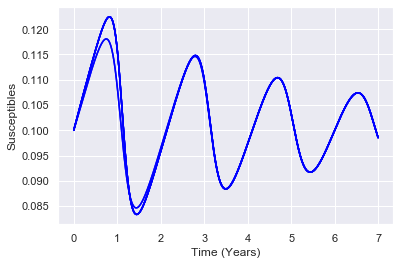

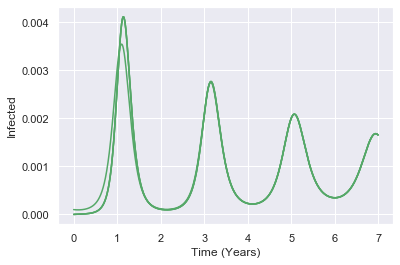

In [99]:
import scipy.integrate as spi

# Number of sub-populations
n = 4

beta = 1.0*np.ones(n)
gamma = 0.1*np.ones(n)
nu = 0.0001*np.ones(n)
mu = 0.0001*np.ones(n)
X0 = 0.1*np.ones(n)
Y0=0.0*np.ones(n)
Y0[0]=0.0001
m = 0.001*np.ones((n,n))
m = m - np.diag(np.diag(m))
ND = 7 * 365

def diff_eqs(INP,t):  
    """
    Main set of equations in the SIR model with metapopulations. 
    """

    Y = np.zeros((2*n))
    V = INP   

    for i in range(n):
        Y[i] = nu[i] - beta[i]*V[i]*V[n+i] - mu[i]*V[i]; 
        Y[n+i] = beta[i]*V[i]*V[n+i] - mu[i]*V[n+i] - gamma[i]*V[n+i]

        for j in range(n):
            Y[i] += m[i][j]*V[j] - m[j][i]*V[i];
            Y[n+i] += m[i][j]*V[n+j] - m[j][i]*V[n+i];
    return Y

t_range = np.arange(t_start, ND, 1)
solution = spi.odeint(diff_eqs, np.hstack((X0,Y0)), t_range)


for i in range(n):
    plt.plot(t_range/365.0, solution[:,i], color='blue')
plt.xlabel('Time (Years)')
plt.ylabel('Susceptibles')
plt.show()

for i in range(n):
    plt.plot(t_range/365.0, solution[:,i+n], color='g')
plt.ylabel('Infected')
plt.xlabel('Time (Years)')
plt.show()



